<a href="https://colab.research.google.com/github/Shayankr/AI_and_ComputerVision/blob/master/Image_Data_Generator(Kaggle_Dogs_vs_Cats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle dataset link: https://www.kaggle.com/competitions/dogs-vs-cats

***Does ImageDataGenerator create more images?**
ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images.*

In [70]:
#Import Necessary Libraries/packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import tensorflow as tf
from tensorflow import keras

In [71]:
#loading Datasets
from keras.datasets import mnist
from keras.datasets import fashion_mnist

In [72]:
#Import modules to make a Model
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.activations import softmax, relu, sigmoid
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [73]:
#Split dataset into training and testing dataset
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [74]:
# Build a Sequebtial Model
model = Sequential([
    Flatten(input_shape=(150,150,3)),
    Dense(256,activation=relu),
    Dense(64,activation=relu),
    Dense(2,activation=softmax),
  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               17280256  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,296,834
Trainable params: 17,296,834
Non-trainable params: 0
_________________________________________________________________


Now, File Handling

In [75]:
#import kaggle

In [76]:
!mkdir -p /root/.kaggle #! mkdir -p ~/.kaggle  # -p is used if file already exist then quit.
!cp kaggle.json /root/.kaggle/

In [77]:
import kaggle

In [78]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [79]:
!pwd

/content


In [80]:
!unzip -q dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [81]:
!unzip -q train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [82]:
#Check image by "OpenCV"

In [83]:
import cv2

In [84]:
sample_image = cv2.imread("train/cat.0.jpg")

In [85]:
type(sample_image)

numpy.ndarray

In [86]:
sample_image.shape

(374, 500, 3)

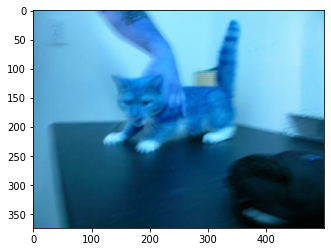

In [87]:
plt.imshow(sample_image)

In [88]:
# Correct the color channel of Image imported (read) by OpenCV
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

In [89]:
# Check shape of an Image
sample_image.shape

(374, 500, 3)

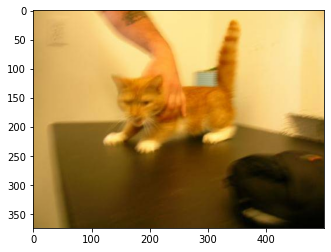

In [90]:
# See image in RGB color channel
plt.imshow(sample_image)

In [91]:
# Let's see the shape of 1st 5 cat images.
image_list=[]
for i in range(5):
  image = cv2.imread(f"train/cat.{i}.jpg")
  size = image.shape
  image_list.append(size)

In [92]:
# All images have different shapes
image_list

[(374, 500, 3), (280, 300, 3), (396, 312, 3), (414, 500, 3), (375, 499, 3)]

In [93]:
# All images have not same size(shape)
# So, We need to reshape all image sin one particular shape.

In [94]:
# Resize (150,150)

In [95]:
import os

In [96]:
# Let's label the image and resize and correct color channel of all images.
allImages=[]
allLabels=[]
for filename in os.listdir("train/"):
  image = cv2.imread("train/"+filename)
  image = cv2.resize(image,(150,150))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  allImages.append(image)
  if "cat" in filename:
    allLabels.append(0)
  else:
    allLabels.append(1)

In [97]:
# 0-cat
# 1-Dog

In [98]:
len(allLabels)

25000

In [99]:
len(allImages)

25000

In [100]:
type(allImages)

list

In [101]:
images=np.array(allImages)

In [102]:
labels = np.array(allLabels)

In [103]:
images.shape

(25000, 150, 150, 3)

Label is:  0


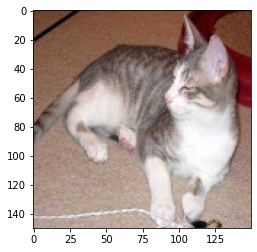

In [104]:
plt.imshow(images[2000])
print("Label is: ",labels[2000])

## Image Data Generator

In [105]:
import os

In [106]:
import shutil

In [107]:
!rm -rf train1
!rm -rf train1/cat
!rm -rf train1/dog

In [108]:
os.mkdir("train1")
os.mkdir("train1/cat")
os.mkdir("train1/dog")

In [109]:
src_folder="train/"
cat_folder="train1/cat/"
dog_folder="train1/dog/"

In [110]:
for image_name in os.listdir(src_folder):
  if "cat" in image_name:
    shutil.copy(src_folder+image_name, cat_folder)
  elif "dog" in image_name:
    shutil.copy(src_folder+image_name, dog_folder)
    

In [111]:
!ls 

dogs-vs-cats.zip  sample_data		test1.zip  train1
kaggle.json	  sampleSubmission.csv	train	   train.zip


In [112]:
!ls train1

cat  dog


In [113]:
# !ls train1/dog

In [114]:
#Image Data Generator

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [116]:
idg = ImageDataGenerator(rescale=1/255.0, validation_split=0.2,)

In [117]:
train_generator=idg.flow_from_directory(directory="train1", target_size=(150,150), class_mode='categorical',
                        batch_size=64, subset='training')

Found 20000 images belonging to 2 classes.


In [118]:
val_generator=idg.flow_from_directory(directory="train1",target_size=(150,150),batch_size=64, subset="validation")

Found 5000 images belonging to 2 classes.


In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               17280256  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,296,834
Trainable params: 17,296,834
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=["acc"])

In [121]:
model_history = model.fit_generator(train_generator, epochs=50,verbose=1,   #verbose=1--means--I want to see progress
                    validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
313/313 [==============================] - 118s 376ms/step - loss: 0.7098 - acc: 0.5555 - val_loss: 0.6636 - val_acc: 0.5968
Epoch 2/50
313/313 [==============================] - 115s 367ms/step - loss: 0.6654 - acc: 0.5951 - val_loss: 0.6590 - val_acc: 0.6056
Epoch 3/50
313/313 [==============================] - 115s 367ms/step - loss: 0.6543 - acc: 0.6136 - val_loss: 0.6570 - val_acc: 0.6082
Epoch 4/50
313/313 [==============================] - 119s 381ms/step - loss: 0.6458 - acc: 0.6248 - val_loss: 0.6598 - val_acc: 0.5930
Epoch 5/50
313/313 [==============================] - 117s 372ms/step - loss: 0.6397 - acc: 0.6288 - val_loss: 0.6500 - val_acc: 0.6216
Epoch 6/50
313/313 [==============================] - 115s 367ms/step - loss: 0.6307 - acc: 0.6424 - val_loss: 0.6344 - val_acc: 0.6362
Epoch 7/50
313/313 [==============================] - 115s 368ms/step - loss: 0.6284 - acc: 0.6424 - val_loss: 0.6540 - val_acc: 0.6154
Epoch 8/50
313/313 [============================

In [122]:
# Check accuracy

In [124]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

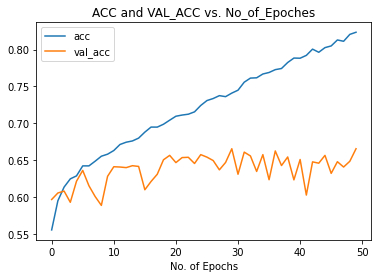

In [127]:
plt.plot(model_history.history.get("acc"),label="acc")
plt.plot(model_history.history.get("val_acc"), label="val_acc")
plt.title("ACC and VAL_ACC vs. No_of_Epoches")
plt.xlabel("No. of Epochs")
plt.legend()
plt.show()

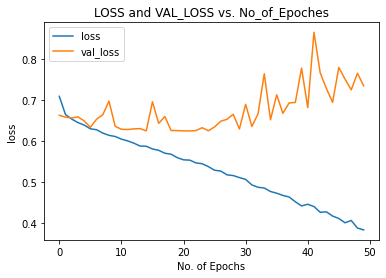

In [128]:
plt.plot(model_history.history.get("loss"),label="loss")
plt.plot(model_history.history.get("val_loss"), label="val_loss")
plt.title("LOSS and VAL_LOSS vs. No_of_Epoches")
plt.xlabel("No. of Epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

In [129]:
# We saw that on increasing the no. of epoches by a large value, only the training accuracy increases not the validation accuracy.
# It means, model goes to overfitting.

In [130]:
# Finally, by this method we can't achieve approx. more than 62%-65%.

In [131]:
# So,after this, We can try-- Image Augmentation.
# But, only slight increament is possible.

In [132]:
# Best way to increase accuracy is to use CNN.

# Thi sis the need of CNN---which consider image part-by-part.

END